# What is the best car in Gran Turismo 7?
> Gran Turismo 7 is a popular racing simulation video game developed by Polyphony Digital and published by Sony Interactive Entertainment. Many players have played this game and curious about which car is the best to use. The author aims to conduct comprehensive analyses from multiple dimensions to provide insightful information to the audience.

> In this project, the author will display the data through various visualisation and DataFrame, allowing the audience to select the dimensions they would like to view. 
    
> <img src="https://hips.hearstapps.com/roa.h-cdn.co/assets/16/20/1463678056-gran-turismo-sport-.gif">

### This project is brought to you by : [Suramate Chokchaisuwan](https://github.com/sc-matthew) 6341232926

---

# Part I: Data Preparation and Data Cleaning
> Description -> The data set contains a list of cars in Gran Turismo 7.

Fields Include:

* model - Car Model from several brands

* category -> Describe Car Type whether it is a Road, Racing, and etc.

* pp -> Performance Point that using in game to rank car

* transmission -> Specified where the gearbox is located

* coll -> stands for "Collector Points", you will gain this when purchasing a new car

* price -> Car Price (Cr.) -> for the unit, "Cr." stands for Credits which you can earn by taking part in races and events.

* hp -> stands for "Horse Power", it is a unit of measurement of power usually in reference to the output of engines or motors. 

* lbs -> Weight of Car (1 lb is approximately equal to 0.45359 kg)

* kg/kw -> Power-to-weight ratio (a type of car performance measurement)

* img_url -> Image URL of cars

---
### Packages Used in This Project
> Please note that if you download this notebook and run it in a different environment with different versions of packages, the results may vary. Additionally, the author has used URL links to retrieve the car pictures from a website. If these pictures are deleted or the path are modified in the future, there may be issues with displaying the pictures.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import requests
from PIL import Image
from io import BytesIO

from ipywidgets import interact
import plotly.express as px
from IPython.display import display
import IPython.display as ipd

print(pd.__version__)
print(pd.Timestamp.now())


1.5.2
2023-03-09 10:00:01.455443


## Retrieve data 
> Author retrieve data from the Kaggle dataset and create a copy of the dataframe to prevent any mistakes that could affect the original data because at the end of the data preparation process, author will compare the data between the original one and the cleaned one to make sure that the data which will be used in the visualisation is valid.

In [32]:
source_url = 'https://github.com/sc-matthew/EDA_Gran-Turismo/raw/main/master_gran_turismo_gt7.csv'
df_raw = pd.read_csv(source_url, names=['model', 'category', 'pp', 'transmission', 'coll', 'price', 'hp', 'lbs',
       'kg/kw', 'img_url'])

df = df_raw.copy()


In [33]:
df.head(5)

,model,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,PP ??,FR,?? pts,?? Cr,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,PP 377,FF,29 pts,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,PP 184,RR,48 pts,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,PP 673,4WD,800 pts,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,PP 523,MR,89 pts,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [34]:
df_raw.columns

Index(['model', 'category', 'pp', 'transmission', 'coll', 'price', 'hp', 'lbs',
       'kg/kw', 'img_url'],
      dtype='object')

## Remove the redundant columns and clean any unwanted strings.
   * Drop the "coll" column as it is redundant with the "price" column.
   * Define a recursive function to clean multiple columns:
        * The "category" column contains multiple values, making it difficult to use in the visualization step. To clean this column:
            1. Create a list of data.
            2. Pass the list of data into the function.
            3. Automatically remove specified text from the cells.
   * Remove word "Midship" from the Category -> Since Midship has the same definition as "MR" in Transmission.
            

> Additionally, the "category" column contains four main values, but one of the values, "professionally tuned" can be imputed. In my opinion, since the cars in this category are tuned for specific purposes, it doesn't make sense to consider them as road cars. It would be more beneficial to categorise them as racing cars instead.

In [35]:
def replace_unwanted_str(dataframe, col_name):

    str_list = ['^\|', '\|$', '\|\|+']

    # replace unwanted characters
    for element in str_list:
        if element in str_list[0:2]:
            dataframe[col_name] = dataframe[col_name].str.replace(
                element, '', regex=True)
        else:
            dataframe[col_name] = dataframe[col_name].str.replace(
                element, '|', regex=True)

    return dataframe


In [36]:
def replace_text(dataframe, col_name, text):

    if type(text) == list:
        for element in text:
            # remove text from columns
            dataframe[col_name] = dataframe[col_name].str.replace(element, '')
            replace_unwanted_str(dataframe, col_name)
    elif type(text) == dict:
        for key, value in text.items():
            for element in value:
                df[key] = df[key].str.replace(
                    element, 'Racing Car', regex=True)
            replace_unwanted_str(dataframe, key)
    else:
        dataframe[col_name] = dataframe[col_name].str.replace(text, '')
        replace_unwanted_str(dataframe, col_name)

    return dataframe


In [37]:
df

,model,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,PP ??,FR,?? pts,?? Cr,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,PP 377,FF,29 pts,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,PP 184,RR,48 pts,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,PP 673,4WD,800 pts,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,PP 523,MR,89 pts,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,PP 656,FF,350 pts,"350,000 Cr",358,2315.0,2.93 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R '10,Road Car,PP 498,FF,51 pts,"51,500 Cr",252,3109.0,5.60 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 '66,Road Car,PP 177,RR,40 pts,"≈32,700 Cr",33,1720.0,23.64 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Gran Turismo Award|Professionally Tuned,PP 518,FR,300 pts,"300,000 Cr",372,2950.0,3.60 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [38]:
drop_list = ['Midship', 'Hypercar', 'Kei Car', 'Pickup Truck', 'Kart']

impute_car_type = {
    'category': ['^Professionally Tuned', 'Professionally Tuned', 'Professionally Tuned$']
}
replace_text_input = [drop_list, impute_car_type]

for input in replace_text_input:
    replace_text(df, 'category', input)


In [39]:
df = df.drop(columns=['coll'], axis=1)


## Remove multiple values from the "category" column
> Data in the "category" column have several values, and were treated as string -> Hence, "Road Car|Hybrid Car" and "Hybrid Car|Road Car" are different
   ``` 
     This is a fragment of the df['category'].value_counts() outcome:
     
     Midship|Road Car                                        39
     Midship|Racing Car                                      33
     Racing Car|Vision Gran Turismo                          11
     Midship|Racing Car|Vision Gran Turismo                   9
     Road Car|Safety Car                                      6
     Professionally Tuned                                     6


## The author first split the data into unique values and then classified it into two groups. 

* The first group is the "Main Category" which refers to the car type, with possible values being "Road Car," "Racing Car," or "Categories unknown." 

* The second group is the "Sub Category," which refers to the car's features or add-ons, with possible values being all values except those already specified in the Main Category, such as "Hybrid Car" or "Vision Gran Turismo."

> The author maintained the Main Category in the "category" column and created a new "sub_category" column. If there is a sub_category value, it is stored as a list that can be iterated through. If there is no sub_category value, the cell's value is stored as NaN.

In [40]:
all_category = []
for data in df['category']:
    all_category.append(data.split('|'))

category_list = ['Road Car', 'Racing Car', 'Categories unknown']
sub_category_list = []

for num, each_list in enumerate(all_category):
    each_subcat_respectively = []
    for element in each_list:
        if element in category_list:
            continue
        else:
            each_subcat_respectively.append(element)
    sub_category_list.append(each_subcat_respectively)

# sub_category_list


In [41]:
df['sub_category'] = sub_category_list
temp_list = []
for data in df['sub_category']:
    if len(data) == 0:
        temp_list.append(np.nan)
    else:
        temp_list.append(data)

df['sub_category'] = temp_list


In [42]:
df = df.iloc[:, [0, 1, 9, 2, 3, 4, 5, 6, 7, 8]]
# df


In [43]:
variable_list = ['Hybrid Car', 'Electric Car', 'Concept Car', 'Vision Gran Turismo',
                 'GT500', 'Safety Car', 'Le Mans', 'Nurburgring 24 Hours', 'Gran Turismo Award']

for element in variable_list:
    replace_text(df, 'category', element)


In [44]:
count_category_dict = {}
for data in df['category']:
    if data in count_category_dict.keys():
        count_category_dict[data] += 1
    else:
        count_category_dict[data] = 1

Category_Dict = count_category_dict
# Category_Dict


In [45]:
count_subcategory_dict = {}
for index, data in enumerate(df['sub_category']):
    if type(df['sub_category'][index]) == float:
        continue
    else:
        for element in data:
            if element in count_subcategory_dict.keys():
                count_subcategory_dict[element] += 1
            else:
                count_subcategory_dict[element] = 1

Sub_Category_Dict = count_subcategory_dict
# Sub_Category_Dict


### After reviewing the data, I found that some of the "image_url" values were not functional. However, a pattern was discovered during the comparison of the working and non-working URLs, and it was found that adding 'gt7' to the URL made all of them functional. However, some of the cars do not have an "image_url" and have been set to 'missing.png'.

In [46]:
def fix_incomplete_url(dataframe):
    new_url = []
    for url in dataframe['img_url']:
        if '//gt' in url or 'missing' in url:
            new_url.append(url)
        else:
            split_list = url.split('/')
            split_list.insert(split_list.index('images'), 'gt7')
            fixed_url = '/'.join(split_list)
            new_url.append(fixed_url)

    dataframe['img_url'] = new_url
    return dataframe


fix_incomplete_url(df)


,model,category,sub_category,pp,transmission,price,hp,lbs,kg/kw,img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,NaN,PP ??,FR,?? Cr,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,NaN,PP 377,FF,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
2,Abarth 595 SS '70,Road Car,NaN,PP 184,RR,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,NaN,PP 673,4WD,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
4,Alfa Romeo 4C '14,Road Car,NaN,PP 523,MR,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,NaN,PP 656,FF,"350,000 Cr",358,2315.0,2.93 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
421,Volkswagen Scirocco R '10,Road Car,NaN,PP 498,FF,"51,500 Cr",252,3109.0,5.60 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
422,Volkswagen Volkswagen 1200 '66,Road Car,NaN,PP 177,RR,"≈32,700 Cr",33,1720.0,23.64 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...
423,Wicked Fabrication Wicked Fabrication GT 51,Racing Car,[Gran Turismo Award],PP 518,FR,"300,000 Cr",372,2950.0,3.60 Kg/Hp,https://www.kudosprime.com/gt7/images/cars/gt7...


## Checking all images for functionality, but some cars have missing picture links which are not working.

In [47]:
import requests
from PIL import Image
from io import BytesIO

count = 0
col_name = 'img_url'

for index, row in df[[col_name]].iterrows():
    try:
        response = requests.get(row[col_name])
        img = Image.open(BytesIO(response.content))
    except IOError:
        count += 1
        print(f"Error opening image at index : {index} | Car name : {df['model'][index]} | Unfuctional Link : {row[col_name]}")

print(f"There are {count} pictures that cannot be displayed !")


Error opening image at index : 8 | Car name : Alfa Romeo 8C 2900B Touring Berlinetta '38 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 36 | Car name : Aston Martin DB5 '64 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 63 | Car name : BMW M3 '89 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 120 | Car name : Ferrari 308 GTB '75 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 208 | Car name : Jeep Willys MB '45 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 260 | Car name : Mercedes-Benz 300 SL (W194) Coupé '52 | Unfuctional Link : https://www.kudosprime.com/images/cars/missing.png
Error opening image at index : 262 | Car name : Mercedes-Benz S Barker Tourer '29 | Unfuctional Link : https://www.kudosprime.com/im

### In several columns, such as "category", "pp", "price", "hp", and "kg/kw", there are strings that cause pandas to recognize them as objects. However, these columns contain numerical values that are necessary for calculations and visualisations. By this reason, the specified columns were cleaned of any specific strings using the ```.str.replace``` method. After removing the strings, the columns were converted into numerical values using the ```pd.to_numeric```.

In [48]:
replace_dict = {
    'pp': ['PP '],
    'price': ['Cr|≈|,'],
    'hp': [','],
    'kg/kw': ['Kg/Hp'],
    'transmission': ['??']
}


In [49]:
def convert_obj_to_string(dataframe, replace_dict):
    for key, value in replace_dict.items():
        if key in ['pp', 'hp', 'kg/kw']:
            df[key] = df[key].str.replace(value[0], "").apply(
                pd.to_numeric, errors='coerce')
        elif key == 'price':
            df[key] = df[key].str.replace(value[0], "", regex=True).apply(
                pd.to_numeric, errors='coerce')
        elif key == 'category':
            for element in value:
                df[key] = df[key].str.replace(
                    element, 'Racing Car', regex=True)
                replace_unwanted_str(dataframe, key)
        elif key == 'transmission':
            df[key] = df[key].str.replace(
                value[0], 'Not Specified', regex=False)
        else:
            print("The function isn't allowed to convert or replace string unintentionally, please create an argument that match your requested.")


convert_obj_to_string(df, replace_dict)


In [50]:
df = df.rename(columns={
    'model': 'Model',
    'category': 'Category',
    'sub_category': 'Sub_Category',
    'pp': 'Performance Point (PP)',
    'transmission': 'Transmission',
    'price': 'Price (Cr.)',
    'hp': 'Horse Power (HP)',
    'lbs': 'Weight (lbs)',
    'kg/kw': 'Power-to-weight ratio (kg/kw)'
})


---


### I retrieved the data from the "GitHub : [pcgeek86/Car Manufacturers.json](https://gist.github.com/pcgeek86/78f4cad29dd16961ceeeee654127a0db) repository. It contains a list of car manufacturers and can be used to distinguish between different models of cars by creating a new column named "manufacturer". By adding this column, it will be more beneficial for creating interactive charts and visualizations, as it provides more precise and accurate information about the car.

### However, during the processes, there are some problems occured. When comparing the text in the manufacturer list and the car model. Some string are match inaccurately and given the wrong result. After investigated the data, I found that only the AMG series, and 4 cars that have a wrong result. Hence, I write if-else argument to correct these values manually.

In [51]:
url = 'https://github.com/sc-matthew/EDA_Gran-Turismo/raw/main/car_manufacturer.csv'

car_list = pd.read_csv(url, header=None, names=['Manufacturer'])
# car_list


In [52]:
manual_edit_exception = {
    "Autobianchi A112 Abarth '85": 'Other Manufacturers',
    "McLaren McLaren F1 GTR - BMW '95": 'McLaren',
    "Mercedes-Benz SLR McLaren 2009": 'Mercedes-Benz',
    "MINI MINI Clubman VGT": 'Mini'
}


In [53]:
manufacturer_list = []

for index, row in df[['Model']].iterrows():
    manufacturer = "Other Manufacturers"

    if row['Model'] in manual_edit_exception:
        manufacturer = manual_edit_exception[row['Model']]

    elif row['Model'][0:3] == 'AMG':
        manufacturer = 'Mercedes-Benz'

    else:
        for brand in car_list['Manufacturer']:
            if brand in row['Model']:
                manufacturer = brand
                break

    manufacturer_list.append(manufacturer)

df.insert(loc=0, column='Manufacturer', value=manufacturer_list)


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Manufacturer                   425 non-null    object 
 1   Model                          425 non-null    object 
 2   Category                       425 non-null    object 
 3   Sub_Category                   93 non-null     object 
 4   Performance Point (PP)         373 non-null    float64
 5   Transmission                   425 non-null    object 
 6   Price (Cr.)                    358 non-null    float64
 7   Horse Power (HP)               410 non-null    float64
 8   Weight (lbs)                   409 non-null    float64
 9   Power-to-weight ratio (kg/kw)  409 non-null    float64
 10  img_url                        425 non-null    object 
dtypes: float64(5), object(6)
memory usage: 36.6+ KB


### However, all the data is in the correct format already as we desired. But, there is still the problem with the outlier data, which can influence our result in the big picture. After investigation, I found that there are three car models which are influential point and decided to remove of the DataFrame which are:
   * McLaren McLaren F1 '94
   * Porsche 917K '70
   * Dodge SRT Tomahawk X VGT

    

In [55]:
df = df[(df['Model'] != "McLaren McLaren F1 '94") & (df['Model'] !=
                                                     "Porsche 917K '70") & (df['Model'] != "Dodge SRT Tomahawk X VGT")]


---
# Part II: Visualisations

## Explanation of Technical Terms:
>To ensure the audience's understanding, author will explain technical terms to make sure we are all the same page.
   
   ### Dimension : Sub-Category
   > * Car Types
       • Midship : A midship car is a vehicle that has its engine located in the middle and also known as mid-engine cars.
       • Concept Car : A concept car is a prototype or mock-up of an automobile design, which is not realistic at that moment.
       • Vision Gran Turismo & Grand Turismo Award : A series of virtual concept cars created specifically for the "Gran Turismo" video game franchise.
       • Safety Car : In motorsport, a safety car is an automobile which limits the speed of competing cars or motorcycles on a racetrack in the case of a caution period.
       • GT500 : the top class of Super GT, the top-level sports car racing series in Japan.
   > * Car Races
       • Le Mans : It is an endurance-focused sports car race held annually near the town of Le Mans, France.
       • Nürburgring 24 Hours : It is a 24-hour annual touring car and GT endurance racing event that takes place in Germany.
       
   ### Dimension : Transmission (Source: GTPlanet webboard by [JockeP22 in respond #4](https://www.gtplanet.net/forum/threads/ff-fr-mr.327739/))
   > * Normally, Transmission have 2 digits, "AB" and having the same meaning regardless the the category of the car (Racing, Road, Unknown).
       • On the first digit "A" -> Indicates where a car's engine is located
       • On the second digit "B" -> Indicates where engine powers going to (Front, Rear Wheels)
           • FF (Front Engine/Front-Wheel Drive): Both steering and transmission of engine power are done entirely through the front wheels.
           • FR (Front Engine/Rear-Wheel Drive): Steering is done through the front wheels, while engine power is transmitted through the rear wheels.
           • MR (Mid-Engine/Rear-Wheel Drive: The engine is located in the middle of the car's body, making this type of drivetrain excellent for cornering. It is relatively well-suited to high-powered engines, and is often used in racing cars.
           • RR (Rear Engine/Rear-Wheel Drive): With this type of drivetrain, the engine is placed even farther back than the rear wheels which power the car. 
           • 4WD (Four-Wheel Drive): The engine's power is transmitted through all four wheels. The amount of stress placed on each tire is reduced, meaning that this type of drivetrain is well-suited to high-powered engines.

In [56]:
type_list = ["Category", "Sub-Category", "Transmission"]
df_countplot = df[(df['Category'] != 'Categories unknown') &
                  (df['Transmission'] != 'Not Specified')]

@interact(Dimension=type_list)
def display_item(Dimension = 'Sub-Category'):
    plt.figure(figsize=(12, 8))
    if Dimension in ["Category", "Sub-Category"]:
        if Dimension == "Category":
            data = Category_Dict
            plt.title("Count of Car Types by Category", fontsize=16)
        else:
            data = Sub_Category_Dict
            plt.title("Count of Car Types by Sub-Category", fontsize=16)

        df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
        df = df.sort_values(by='Count', ascending=False)
        color = ['tab:red' if i < 3 else 'tab:grey' for i in range(len(df))]
        sns.barplot(x=df['Count'], y=df.index, orient="h", palette=color)
        plt.show()
    else:
        sns.countplot(x='Category', data=df_countplot,
                      order=df_countplot['Category'].unique(), hue='Transmission')
        plt.title("Count of Transmission by Category", fontsize=16)
        plt.xlabel("Category", fontsize=16)
        plt.show()


interactive(children=(Dropdown(description='Dimension', index=1, options=('Category', 'Sub-Category', 'Transmi…

### Correlation : It is a value that indicates the relationship of the variable 2, where the correlation coefficient is between -1.0 to +1.0. If it is found that the r value is close to -1.0, it means that the two variables are related in the opposite direction. On the contrary, if the r value approaches +1.0, it means that both variables are related in the same direction. But if the two variables have a correlation coefficient equal to 0, then the two variables are not related.

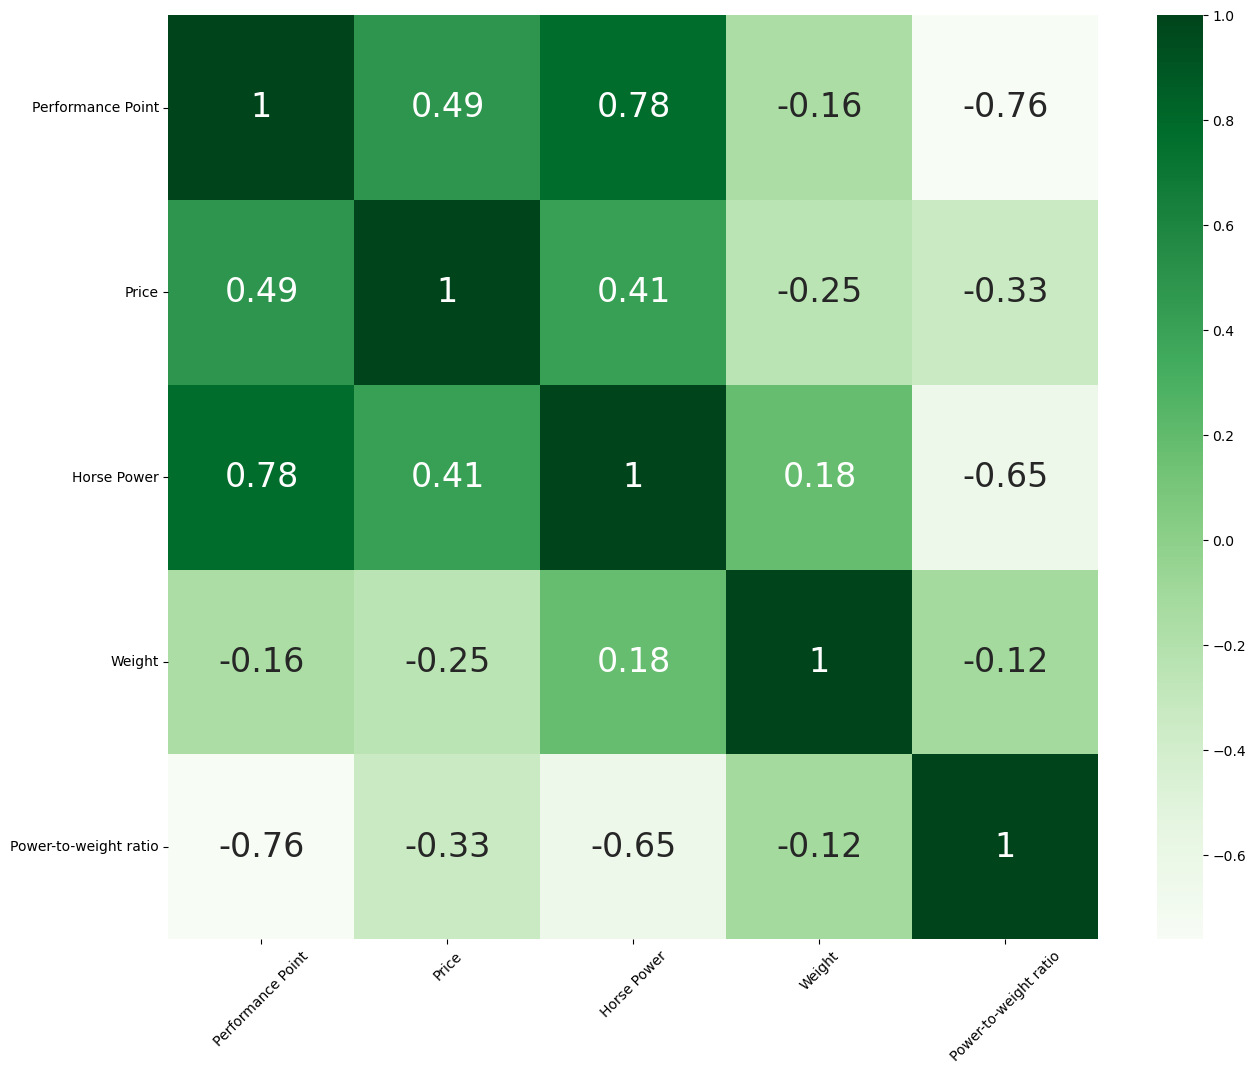

In [57]:
corr_df = df[df.columns[df.columns.isin(
    ['Performance Point (PP)', 'Price (Cr.)', 'Horse Power (HP)', 'Weight (lbs)', 'Power-to-weight ratio (kg/kw)'])]]
corr_df.columns = ['Performance Point', 'Price',
                   'Horse Power', 'Weight', 'Power-to-weight ratio']

sb_corr = corr_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(sb_corr, cmap='Greens', annot=True, annot_kws={"size": 24})

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [58]:
columns = df[df.columns[df.columns.isin(
    ['Performance Point (PP)', 'Price (Cr.)', 'Horse Power (HP)', 'Weight (lbs)', 'Power-to-weight ratio (kg/kw)'])]]


def interactive_scatter_plot(x_axis='Performance Point (PP)', y_axis='Horse Power (HP)'):
    fig = px.scatter(df, x=x_axis, y=y_axis, text='Model')
    fig.update_traces(mode='markers', marker=dict(size=10, color="red"))
    fig.update_layout(hovermode='closest', hoverlabel=dict(
        bgcolor="white", font_size=14, font_family="Rockwell"))

    fig.update_layout(title={
        'text': f"The scatterplot between {x_axis} and {y_axis}",
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center'
    })

    ipd.clear_output(wait=True)
    fig.show()


interact(interactive_scatter_plot, x_axis=columns, y_axis=columns)
print('')


interactive(children=(Dropdown(description='x_axis', options=('Performance Point (PP)', 'Price (Cr.)', 'Horse …

In [59]:
sort_method_list = ["Ascending", "Descending"]

@interact(
    Brand=df["Manufacturer"].unique(),
    Sort_by=df.columns[1:9],
    Sort_method=sort_method_list,
    Model_Search=".",
)
def table_filter_brand(Brand = 'McLaren', Sort_by = 'Horse Power (HP)', Sort_method = 'Descending', Model_Search = '.'):
    df_filtered = df[
        (df["Manufacturer"] == Brand)
        & (df["Model"].str.contains(Model_Search, regex=True, case=False))
    ].drop(df.iloc[:, 9:], axis=1)

    df_filtered = df_filtered[~(pd.isna(df_filtered["Price (Cr.)"]) | pd.isna(df_filtered["Performance Point (PP)"]))]
    
    if Sort_method == "Ascending":
        df_filtered.sort_values(by=Sort_by, ascending=True, inplace=True)
    else:
        df_filtered.sort_values(by=Sort_by, ascending=False, inplace=True)

    return df_filtered


interactive(children=(Dropdown(description='Brand', index=27, options=('Abarth', 'Alfa Romeo', 'Other Manufact…

In [60]:
# Function to display the details and image for a given item
@interact(Model=df['Model'].unique())
def display_item(Model='McLaren McLaren VGT'):
    print('\n This is the details of your selected car 🚗 \n')
    details = df.loc[df['Model'] == Model].drop(df.iloc[:, 9:], axis=1)
    display(details)
    print('\n')

    image_url = df.loc[df['Model'] == Model]['img_url'].values[0]
    try:
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except:
        if 'missing.png' in image_url:
            print('\n The picture of this selected car is missing.')
        else:
            print(
                f" There is a problem when opening the picture. \n This is the URL Link of the picture : {df.loc[df['Model'] == Model]['img_url'].values[0]}")


interactive(children=(Dropdown(description='Model', index=255, options=("Abarth 1500 Biposto Bertone B.A.T 1 '…

---
# Part III : Summary

### The author of this project aims to analyze and determine the best car to use in the popular racing simulation video game, Gran Turismo 7. The data will be presented in a comprehensive by using visualisation to help the audience understand the information. 

To determine the best car, several key factors will be considered, including performance points, horse power, weight, and power-to-weight ratio. 

* Performance Point : The more, the better
* Horse Power : The more, the better
* Weight : The less, the better
* Power-to-weight Ratio : The less, the better

### The author utilize seaborn correlation graphs to show the relationship between these factors, and the scatterplot will provide additional information on specific cars. Most importantly, you can hover over the scatterplot to see the details of the car which represented by each spot. The author also have a brand filter graph, allowing the audience to view the cars based on their preferred brand. Lastly, the audience are able to select a specific car from a drop-down list, viewing its details and the picture of the car.

### In conclusion, selecting the best car for the game requires considering multiple factors. I hope that data and visualization can help and provide you valuable insights to aid in the decision.